In [2]:
import pandas as pd
from pyprojroot import here

df = pd.read_parquet(here("data/goemotions_grouped.parquet"))
df

,id,text,raters,author,subreddit,link_id,parent_id,emotion_sadness,emotion_neutral,emotion_love,...,emotion_nervousness,emotion_embarrassment,emotion_surprise,emotion_anger,emotion_grief,emotion_pride,emotion_desire,emotion_relief,emotion_fear,created_at
0,eczazk6,Fast as [NAME] will carry me. Seriously uptown...,2,Uptownorbust,NewOrleans,t3_abbbq3,t1_eczavr9,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 00:00:19+00:00
1,eczb07q,You blew it. They played you like a fiddle.,2,ima_coder,self,t3_abca3b,t3_abca3b,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 00:00:34+00:00
2,eczb4bm,TL;DR No more Superbowls for [NAME]. Get ready...,3,social_psycho,steelers,t3_ab8t8l,t3_ab8t8l,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 00:02:14+00:00
3,eczb527,So much time saved. Not.,3,TouristsOfNiagara,Roadcam,t3_abal7g,t3_abal7g,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 00:02:32+00:00
4,eczb6r7,Emotes have a ridiculous amount of effort put ...,5,Reggiardito,Blackops4,t3_abasbo,t1_ecz9n7h,0.2,0.400000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-01 00:03:14+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58006,efhclgb,[NAME]. I’m not sure you’ll feel the same way ...,3,Terry-got-Traps,bodybuilding,t3_als7n5,t1_efhar1v,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-31 23:53:59+00:00
58007,efhcm78,I can see why! I would totally be offended too!,5,jdoucette28,greysanatomy,t3_alucoa,t1_efhclce,0.2,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-31 23:54:24+00:00
58008,efhcnhz,Approaching doesn't work unless you are [NAME]...,3,Erramayhem89,ForeverAlone,t3_alr0jd,t3_alr0jd,0.0,1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-31 23:55:22+00:00
58009,efhcreo,Hahaha perfect.,3,Deathwatch72,CollegeBasketball,t3_aljkse,t1_efhcido,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-31 23:57:48+00:00


C:\Users\ap9169\AppData\Local\Temp\ipykernel_5760\1935095329.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = ordered_mat.applymap(lambda x: f"{x:.2f}" if abs(x) >= 0.1 else "")


Text(0.5, 1.0, 'Hierarchical Clustering of Emotions')

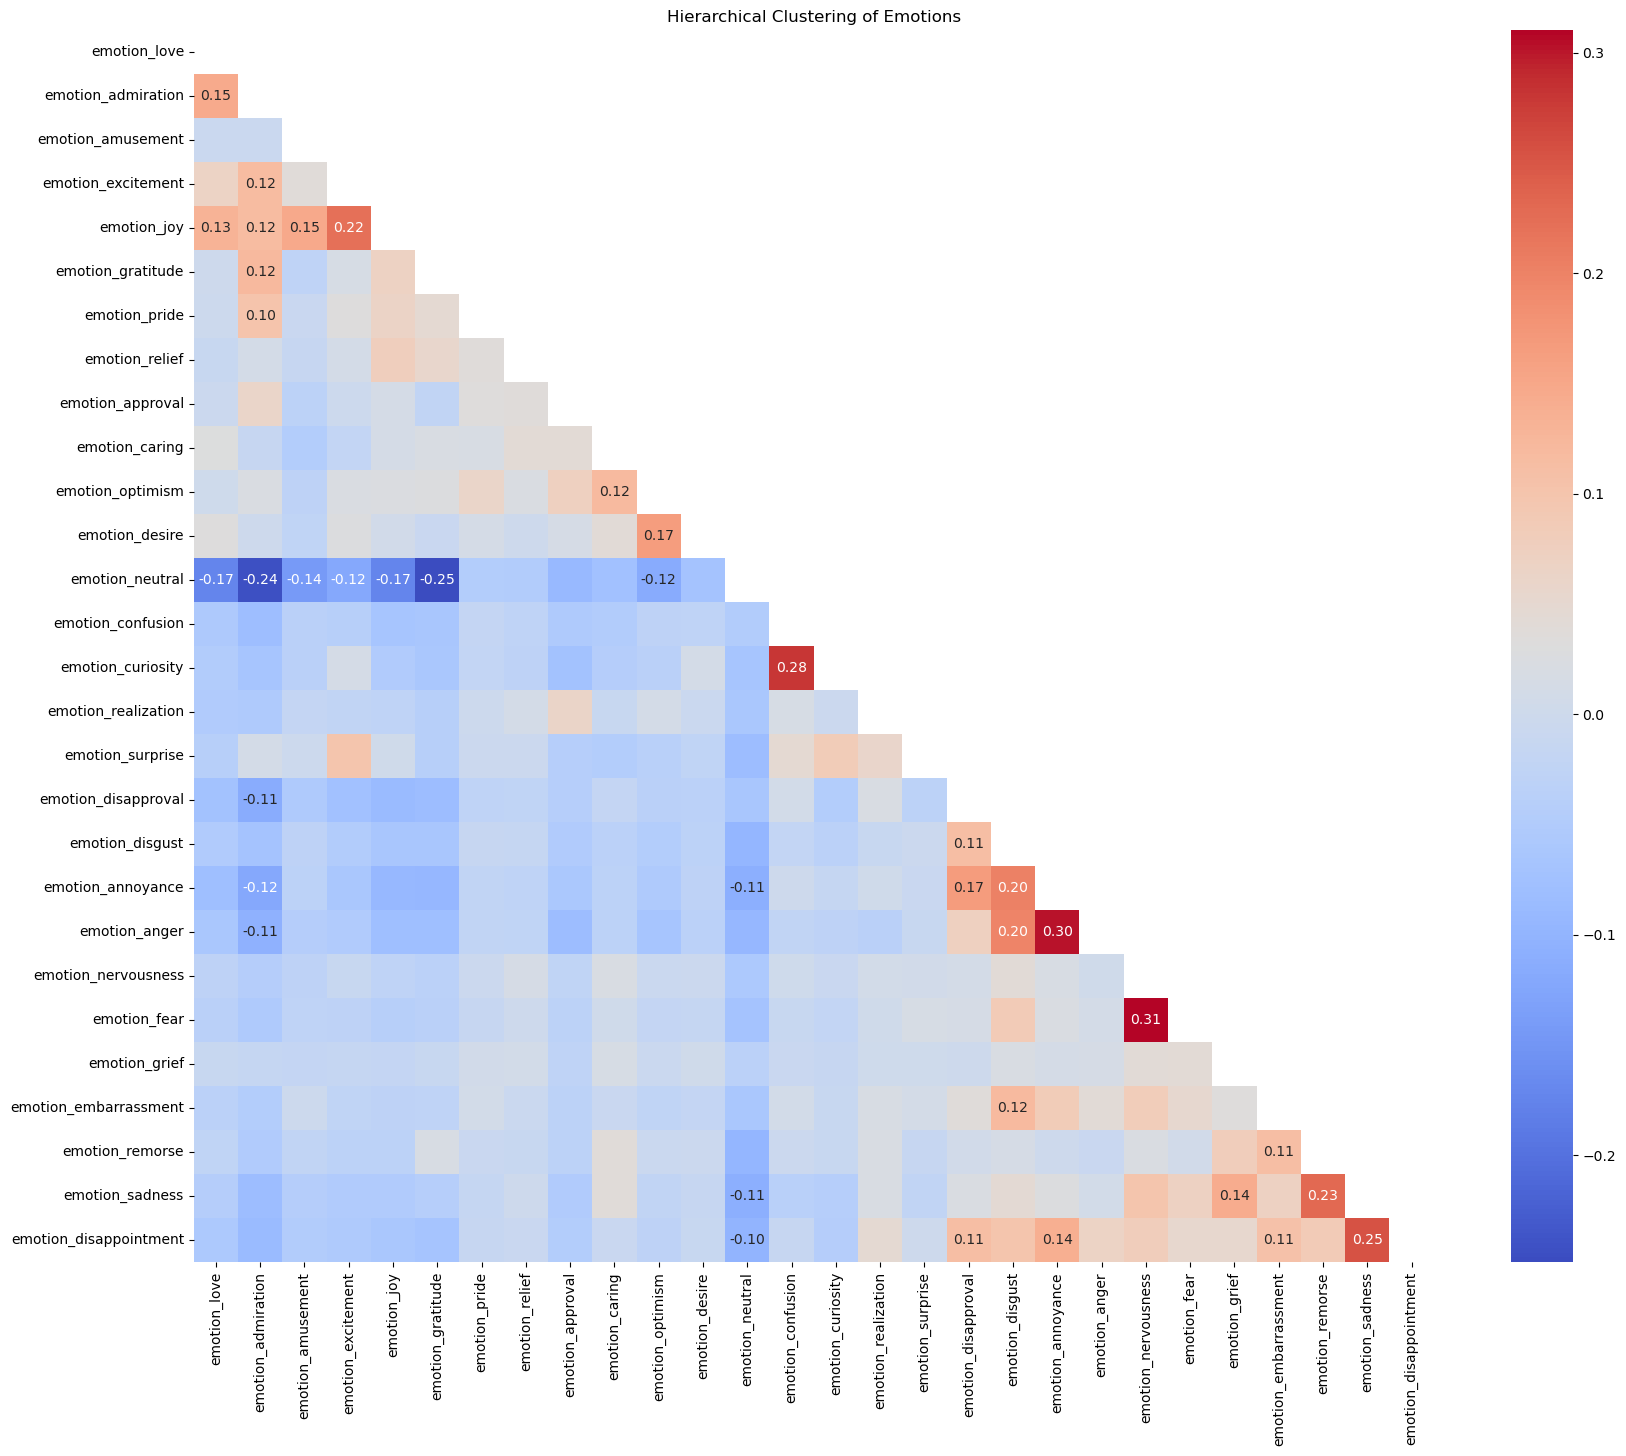

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list
from scipy.spatial.distance import pdist, squareform
import numpy as np

corr = df.loc[:, df.columns.str.startswith("emotion_")].corr(method="spearman")
linkage = linkage(corr, method="ward")
dendro = dendrogram(linkage, no_plot=True)
ordered_ = leaves_list(linkage)
ordered_mat = corr.iloc[ordered_, ordered_]
plt.figure(figsize=(20, 16))
mask = np.triu(np.ones_like(ordered_mat, dtype=bool))
annot = ordered_mat.applymap(lambda x: f"{x:.2f}" if abs(x) >= 0.1 else "")
sns.heatmap(ordered_mat, cmap="coolwarm", annot=annot, cbar=True, fmt="", mask=mask)
plt.title("Hierarchical Clustering of Emotions")

C:\Users\ap9169\AppData\Local\Temp\ipykernel_5760\3362647776.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.values, y=emotion_counts.index, palette="viridis")


''

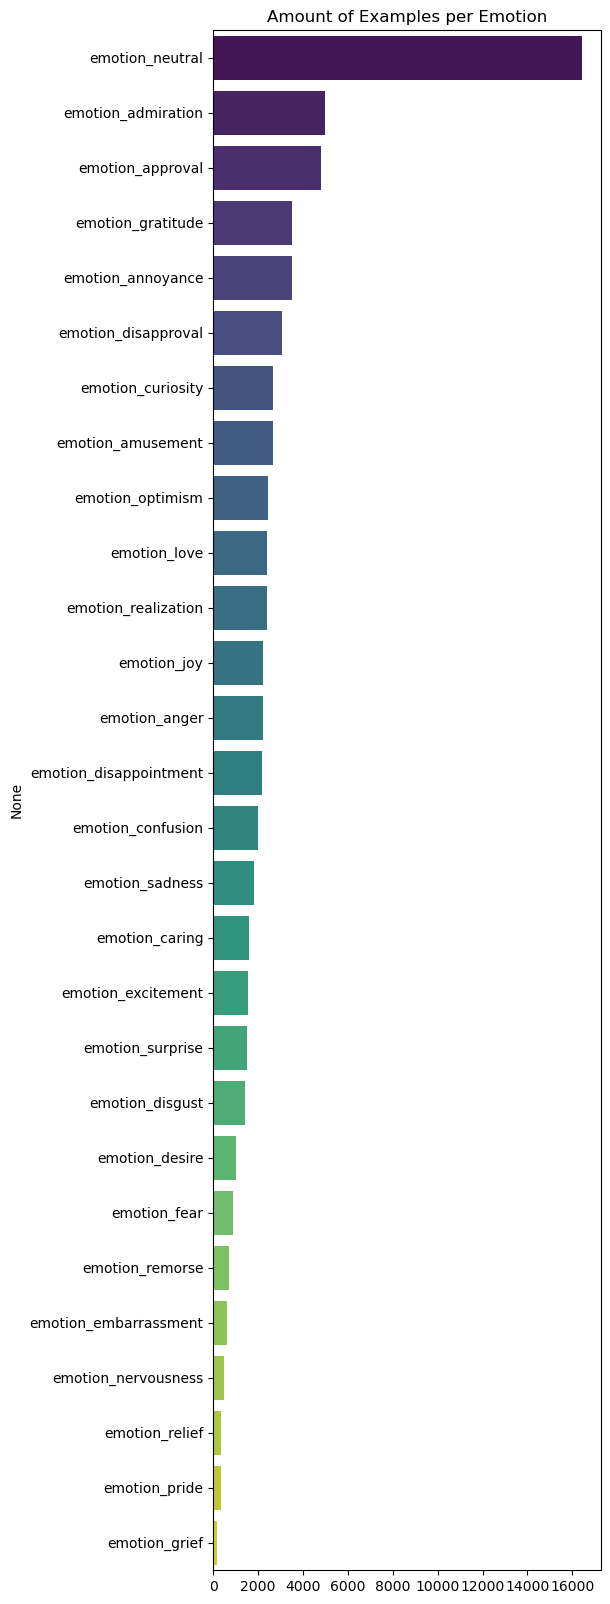

In [ ]:
# plot amount of examples per emotion using seaborn
import seaborn as sns

emotion_counts = df.loc[:, df.columns.str.startswith("emotion_")].sum().sort_values(ascending=False)
plt.figure(figsize=(5,20))
sns.barplot(x=emotion_counts.values, y=emotion_counts.index, palette="viridis")
plt.title("Amount of Examples per Emotion")
""